<a href="https://colab.research.google.com/github/Ankushsb62/OASIS-INFOBYTE/blob/PROJECT-4/Sentiment_Analysis_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
Twitter_Data = pd.read_csv('Twitter_Data.csv')

In [ ]:
Twitter_Data.shape

(162980, 2)

In [ ]:
Twitter_Data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
Twitter_Data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
cols_with_nulls = Twitter_Data.columns[Twitter_Data.isnull().any()]
print(cols_with_nulls)

Index(['clean_text', 'category'], dtype='object')


In [ ]:
missing_rows = Twitter_Data[Twitter_Data.isnull().any(axis=1)]
print(missing_rows)

                                               clean_text  category
148                                                   NaN       0.0
130448  the foundation stone northeast gas grid inaugu...       NaN
155642  dear terrorists you can run but you cant hide ...       NaN
155698  offense the best defence with mission shakti m...       NaN
155770  have always heard politicians backing out thei...       NaN
158693  modi government plans felicitate the faceless ...       NaN
158694                                                NaN      -1.0
159442               chidambaram gives praises modinomics       NaN
159443                                                NaN       0.0
160559  the reason why modi contested from seats 2014 ...       NaN
160560                                                NaN       1.0


In [ ]:
total_nulls = Twitter_Data.isnull().sum().sum()
print(f"Total missing values: {total_nulls}")

Total missing values: 11


In [ ]:
Twitter_Data_cleaned = Twitter_Data.dropna()

In [ ]:
cols_with_nulls = Twitter_Data_cleaned.columns[Twitter_Data_cleaned.isnull().any()]
print(cols_with_nulls)

Index([], dtype='object')


In [ ]:
Twitter_Data_cleaned.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
category_counts = Twitter_Data_cleaned['category'].value_counts()
print(category_counts)

category
 1.0    72249
 0.0    55211
-1.0    35509
Name: count, dtype: int64


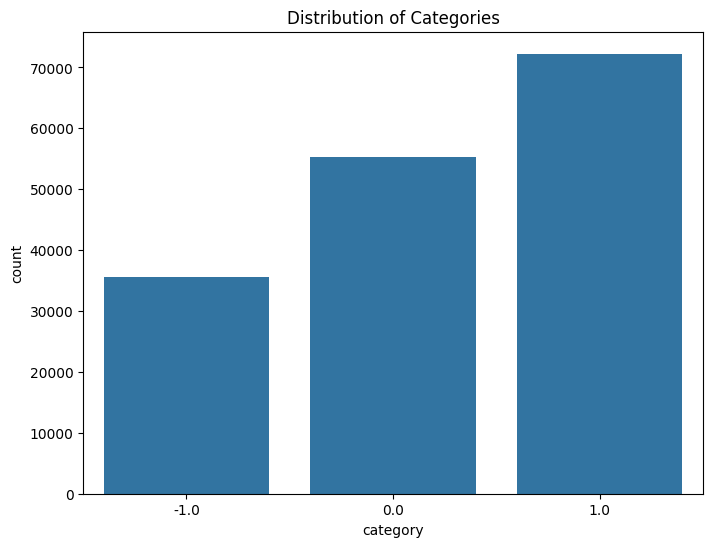

In [ ]:
# Visualize category distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=Twitter_Data_cleaned)
plt.title('Distribution of Categories')
plt.show()

In [ ]:
# Find the minimum count
min_count = category_counts.min()



In [ ]:
# Create a new DataFrame with balanced data
balanced_data = pd.DataFrame()



In [ ]:
# Iterate over each category
for category, count in category_counts.items():
    # Get the data for the current category
    data = Twitter_Data_cleaned[Twitter_Data_cleaned['category'] == category]

    # If the count is greater than the minimum, randomly sample to match the minimum
    if count > min_count:
        data = data.sample(n=min_count, random_state=42)

    # Append the sampled data to the balanced DataFrame
    balanced_data = pd.concat([balanced_data, data], ignore_index=True)



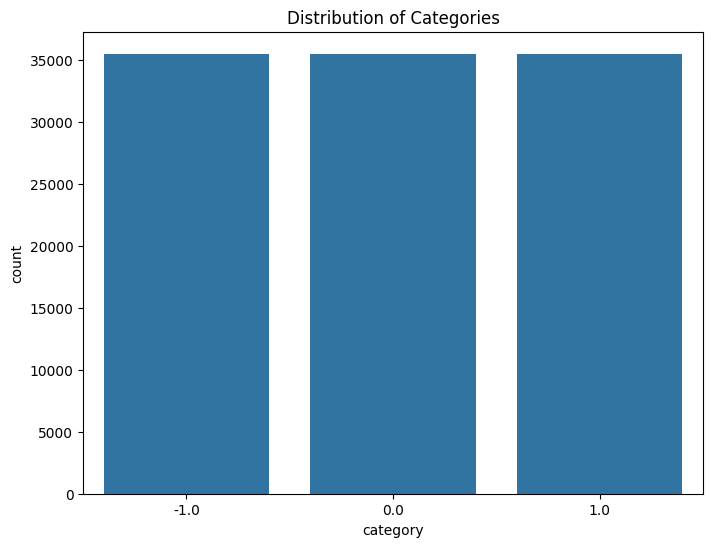

In [ ]:
# Visualize category distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=balanced_data)
plt.title('Distribution of Categories')
plt.show()

In [ ]:
# Stemming
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
balanced_data['stemmed_content'] = balanced_data['clean_text'].apply(stemming)

In [ ]:
# Separate data and labels
X = balanced_data['stemmed_content'].values
Y = balanced_data['category'].values

In [ ]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
# Convert text data to numerical data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
# Model Evaluation
# Accuracy Score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score on the training data:', training_data_accuracy)

Accuracy score on the training data: 0.788385491838866


In [ ]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score on the testing data:', testing_data_accuracy)

Accuracy score on the testing data: 0.6854407209236835


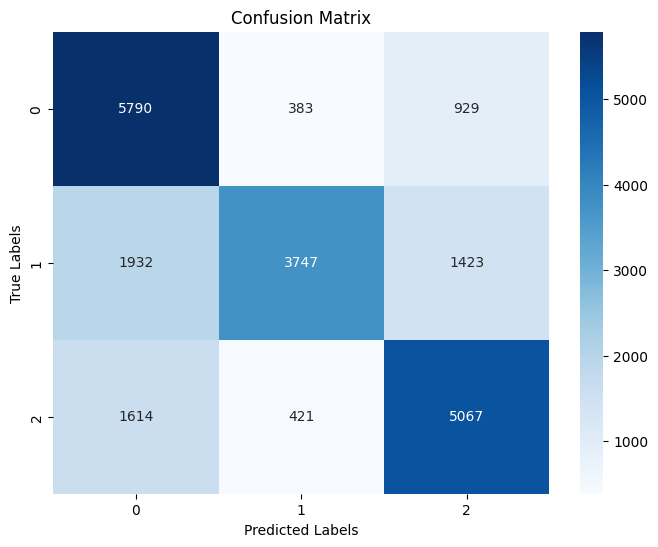

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Save the trained model
import pickle
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# Using saved model for future prediction
# Loading the saved model
Loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
X_new = X_test[20]
print(Y_test[20])
prediction = Loaded_model.predict(X_new)
print(prediction)
if (prediction[0]==0):
  print('Neutral')
elif (prediction[0]==1):
  print('Positive')
else:
  print('Negative')

0.0
[0.]
Neutral


In [ ]:
X_new = X_test[27]
print(Y_test[27])
prediction = Loaded_model.predict(X_new)
print(prediction)
if (prediction[0]==0):
  print('Neutral')
elif (prediction[0]==1):
  print('Positive')
else:
  print('Negative')

0.0
[0.]
Neutral


In [ ]:
X_new = X_test[130]
print(Y_test[130])
prediction = Loaded_model.predict(X_new)
print(prediction)
if (prediction[0]==0):
  print('Neutral')
elif (prediction[0]==1):
  print('Positive')
else:
  print('Negative')

1.0
[1.]
Positive
